In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display
import json

In [2]:
from pathlib import Path
path = str(Path(os.getcwd()).parent)

import sys
sys.path.insert(0,path)

from breakout.vae.vae import ConvVAE

import_path = str(Path(os.getcwd()).parent.parent)
sys.path.insert(0, import_path)
from breakout.model import simulate, make_model

In [3]:
obs_path = path + '/breakout/record'
LATENT_DIM = 32
vae_path = path +'/breakout/tf_vae'
rnn_path = path + '/breakout/tf_rnn'
trainparam_path = path + '/breakout/tf_vae/vae_train_param.json'
batch_size=230

In [4]:
def load_raw_data_list(filelist, obs_path):
    data_list = []
    action_list = []
    counter = 0
    for i in range(len(filelist)):
        filename = filelist[i]
        raw_data = np.load(os.path.join(obs_path, filename))
        data_list.append(raw_data['obs'])
        action_list.append(raw_data['action'])
        if ((i+1) % 1000 == 0):
            print("loading file", (i+1))
    return data_list, action_list

In [5]:
filelist = os.listdir(obs_path)
dataset, action_dataset = load_raw_data_list(filelist, obs_path)
dataset[0].shape

(1000, 64, 64, 3)

# VAE

In [ ]:
vae = ConvVAE(batch_size=batch_size, is_training=False)
vae.load_json(os.path.join(vae_path,'vae.json'))

In [ ]:
obs = dataset
obs[0].shape
import PIL.Image
PIL.Image.fromarray(obs[5][100], mode='RGB')


In [ ]:
obs1 = np.array(obs[5][100], dtype=np.float32)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(np.array(obs1*255., dtype=np.int))
plt.subplot(1,2,2)
plt.imshow(obs1)

In [ ]:
z = vae.encode(obs[5])
z.shape

In [ ]:
z_dec = vae.decode(z)
z_dec.shape

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(z_dec[100])
plt.subplot(1,2,2)
plt.imshow(np.array(z_dec[100]*255., dtype=np.int))

# Record 200225
record from server to test if images are still completely black

In [4]:
record_path = path + '/breakout/record_200225'
batch_size=400

In [6]:
filelist = os.listdir(record_path)
dataset, action_dataset = load_raw_data_list(filelist, record_path)
dataset[0].shape

(400, 64, 64, 3)

In [7]:
dataset = np.array(dataset, dtype=np.float32)

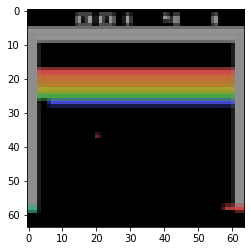

In [8]:
plt.imshow(dataset[5][101])

# Record 200226

In [3]:
record_path = path + '/breakout/record_200225'
batch_size = 400

## gif
https://imageio.readthedocs.io/en/stable/examples.html

In [ ]:
import imageio
import matplotlib.pyplot as plt

n = 100
gif_path = "test.gif"
frames_path = "{i}.jpg"

n = 100
plt.figure(figsize=(4,4))
for i, x in enumerate(range(n)):
    plt.scatter(x/n, x/n)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.savefig("{i}.jpg".format(i=i))

with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(n):
        writer.append_data(imageio.imread(frames_path.format(i=i))

## Rescale Image back to original size

In [9]:
dataset[0].shape

(230, 64, 64, 3)

In [13]:
obs_test = dataset[0][0]
obs_test.dtype

dtype('float16')

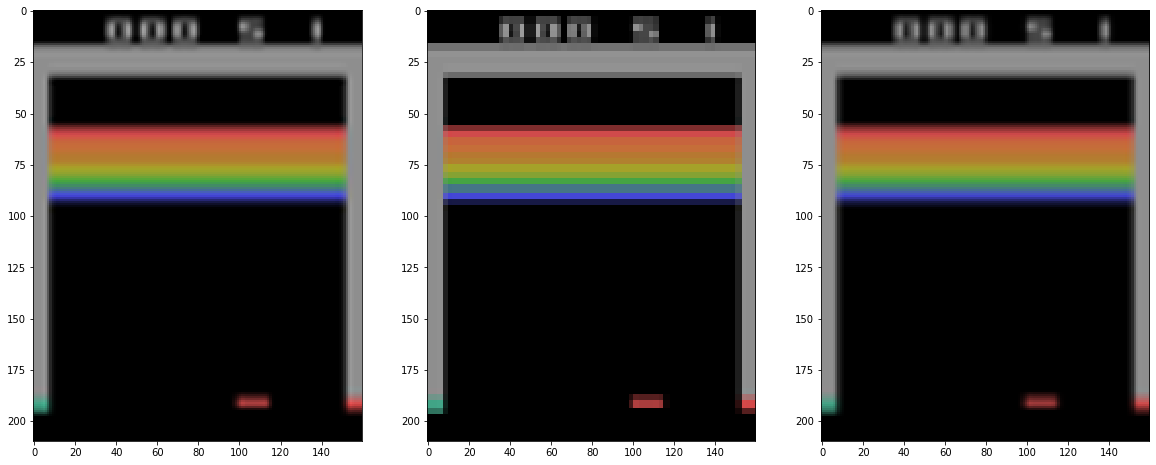

In [14]:
from PIL import Image
img = Image.fromarray((obs_test*255).astype(np.uint8))
img1 = img.resize(size=(160,210))
img2 = img.resize(size=(160,210), resample=Image.NEAREST)
img3 = img.resize(size=(160,210), resample=Image.BILINEAR)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(1,3,2)
plt.imshow(img2)
plt.subplot(1,3,3)
plt.imshow(img3)
plt.show()

# Simulate investigation

In [2]:
import statistics

In [5]:
with open('/home/student/PycharmProjects/worldmodel/WorldModelsExperiments/breakout/action_collection.json') as f:
    file = json.load(f)


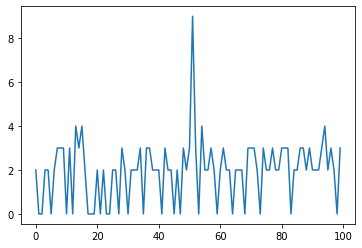

Mean:  1.96


In [6]:
reward_list = []
counter = 0
for trial in file:
    reward_list.append(file[counter]['rewards'])
    counter+=1
plt.plot(reward_list)
plt.show()
print('Mean: ', statistics.mean(reward_list))

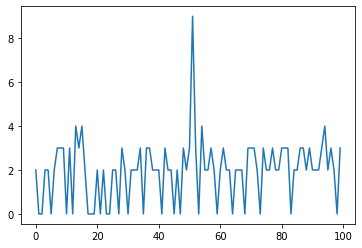

Mean:  1.96


In [9]:
with open('/home/student/PycharmProjects/worldmodel/WorldModelsExperiments/breakout/action_collection_1.json') as f:
    file2 = json.load(f)

reward_list2 = []
counter = 0
for trial in file2:
    reward_list2.append(file2[counter]['rewards'])
    counter+=1
plt.plot(reward_list2)
plt.show()
print('Mean: ', statistics.mean(reward_list2))

In [24]:
len(file)

100

In [26]:
action_list_0 = file[0]['actions']
action_list_1 = file[51]['actions']
action_list_0 == action_list_1

True

### Reward 0

In [22]:
zero_reward = []
counter =0
for trial in file:
    if file[counter]['rewards'] ==0:
        zero_reward.append(counter)
    counter +=1


[1,
 2,
 5,
 10,
 12,
 17,
 18,
 19,
 21,
 23,
 24,
 27,
 30,
 35,
 41,
 45,
 47,
 53,
 59,
 64,
 68,
 73,
 83,
 98]

In [11]:
set(file[1]['actions'])

{0, 1, 2, 3}

In [12]:
file[1]['actions'].count(1)

145

In [14]:
file[51]['actions'].count(3)

214

Trial  1
[55, 145, 276, 23]
1
Trial  2
[42, 121, 306, 22]
2
Trial  5
[81, 108, 264, 91]
3
Trial  10
[55, 148, 293, 15]
4
Trial  12
[51, 135, 290, 16]
5
Trial  17
[51, 143, 294, 15]
6
Trial  18
[72, 129, 287, 15]
7
Trial  19
[59, 137, 289, 20]
8
Trial  21
[55, 129, 302, 19]
9


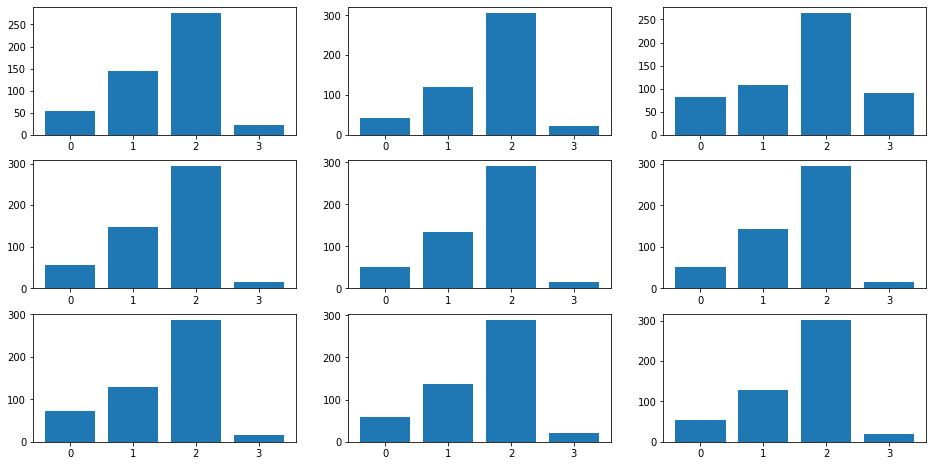

In [10]:
zero_reward_snap = zero_reward[:9]

counter = 1
plt.figure(figsize=(16,8))
for trial in zero_reward_snap:
    print('Trial ', trial)
    action_set = set(file[trial]['actions'])
    actions_counted = []
    for elem in action_set:
        actions_counted.append(file[trial]['actions'].count(elem))
        
    plt.subplot(3,3, counter)
    plt.bar(list(action_set), actions_counted)
    print(actions_counted)
    print(counter)
    counter += 1
    
plt.show()


### Reward 2

In [15]:
reward_two = []
counter =0
for trial in file:
    if file[counter]['rewards'] ==2:
        reward_two.append(counter)
    counter +=1


[0,
 3,
 4,
 6,
 16,
 20,
 22,
 25,
 26,
 29,
 31,
 32,
 33,
 38,
 39,
 40,
 43,
 44,
 46,
 49,
 55,
 56,
 58,
 60,
 62,
 63,
 65,
 66,
 67,
 72,
 75,
 76,
 78,
 79,
 84,
 85,
 88,
 90,
 91,
 92,
 95,
 97]

0
[85, 304, 332, 75]
3
[71, 230, 468, 24]
4
[83, 222, 458, 26]
6
[99, 222, 413, 79]
16
[84, 213, 469, 26]
20
[78, 183, 505, 29]
22
[70, 222, 468, 33]
25
[62, 217, 490, 22]
26
[114, 237, 372, 77]


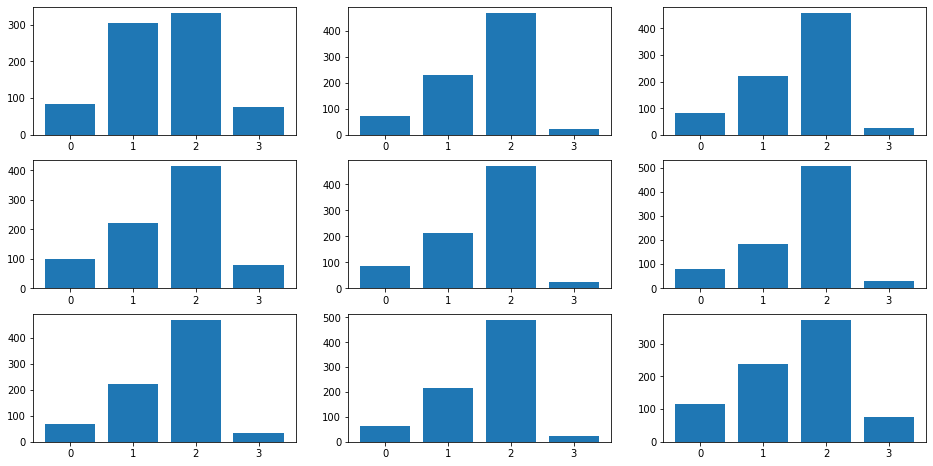

In [17]:
reward_two_snap = reward_two[:9]

counter = 1
plt.figure(figsize=(16,8))
for trial in reward_two_snap:
    print(trial)
    actions_set = set(file[trial]['actions'])
    actions_counted = []
    for elem in actions_set:
        actions_counted.append(file[trial]['actions'].count(elem))
        
    plt.subplot(3,3, counter)
    plt.bar(list(action_set), actions_counted)
    print(actions_counted)
    
    counter += 1
    
plt.show()

# tsne
do observations lead to actions ?
Does it makes sense? Probably each observations doesn't lead to a single action. but maybe several observations are leading to a single action? How many observations ?
Can be helpful in the evaluation process.

In [16]:
import pandas as pd

In [4]:
model = make_model(rnn_path=os.path.join(rnn_path, 'rnn.json'), vae_path=os.path.join(vae_path, 'vae.json'))

INFO:tensorflow:Model using cpu.


In [5]:
model.load_model('/home/student/PycharmProjects/worldmodel/WorldModelsExperiments/breakout/log/breakout.cma.16.64.best.json')

loading file /home/student/PycharmProjects/worldmodel/WorldModelsExperiments/breakout/log/breakout.cma.16.64.best.json


In [11]:
reward, steps_taken, action_list, obs_list = simulate(model,
      train_mode=False, render_mode=False, num_episode=100)

In [12]:
len(action_list)

100

In [10]:
len(action_list[0])

819

In [23]:
action_list[0][0]

2

In [26]:
obs_list[0][0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
     

In [31]:
counter_1 = 0
data = pd.DataFrame(columns=['observation', 'action'])
for trial in action_list:
    counter_2 = 0
    for elem in trial:
        data.append([obs_list[counter_1][counter_2], elem])
        counter_2 +=1
    counter_1 =+1
data.head()

IndexError: list index out of range

## Display one observation for thesis

In [7]:
import gym
env = gym.make('Breakout-v0')

/home/student/PycharmProjects/worldmodel/venv/lib/python3.6/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


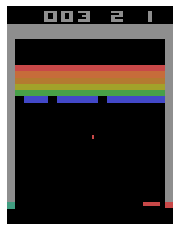

In [41]:
obs = env.reset()
for i in range(250):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
plt.imshow(observation)
plt.axis('off')
plt.show()

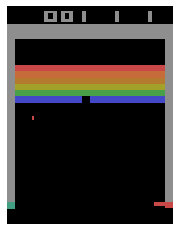

In [40]:
plt.imshow(observation)
plt.axis('off')
plt.show()


# Inspect observations in record "..-version-v3/200321/record"



In [1]:
import numpy as np

In [3]:
data = np.load('/home/student/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200321/record/2147335555.npz')['obs']

In [5]:
data.shape

(500, 64, 64, 3)

In [6]:
import base64
import imageio
import IPython
from PIL import Image

In [7]:
def embed_mp4(filename,video):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

In [8]:
filename = 'observations.mp4'
with imageio.get_writer(filename, mode='I', macro_block_size=None) as video:    
    for image in range(len(data)):
        video.append_data(data[image])
embed_mp4(filename,video)

Lossy conversion from float16 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float16 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float16 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float16 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float16 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float16 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float16 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float16 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float16 to uint8. Range [0